In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set a consistent style for plots
sns.set_theme(style="whitegrid")

# Load dataset
# Replace `your_dataset.csv` with the actual dataset path
data=pd.read_csv('../Dataset/heart.csv')

# Display the first few rows of the dataset
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
data.drop(["RestingECG",'ExerciseAngina','ST_Slope','Sex','ChestPainType'], axis=1, inplace=True)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [3]:

X = data.drop('HeartDisease', axis=1)  
y = data['HeartDisease']


In [4]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)
print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Testing Set: {X_test.shape}")

Training Set: (550, 6), Validation Set: (184, 6), Testing Set: (184, 6)


In [6]:
nb_model = GaussianNB()

# Define hyperparameter configurations
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 50)  # Example parameter grid
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e-09, 1.52641797e-09, 2.32995181e-09, 3.55648031e-09,
       5.42867544e-09, 8.28642773e-09, 1.26485522e-08, 1.93069773e-08,
       2.94705170e-08, 4.49843267e-08, 6.86648845e-08, 1.04811313e-07,
       1.59985872e-07, 2.44205309e-07, 3.72759372e-07, 5.68986603e-07,
       8.68511374e-07, 1.32571137e-06, 2.02...
       1.38949549e-04, 2.12095089e-04, 3.23745754e-04, 4.94171336e-04,
       7.54312006e-04, 1.15139540e-03, 1.75751062e-03, 2.68269580e-03,
       4.09491506e-03, 6.25055193e-03, 9.54095476e-03, 1.45634848e-02,
       2.22299648e-02, 3.39322177e-02, 5.17947468e-02, 7.90604321e-02,
       1.20679264e-01, 1.84206997e-01, 2.81176870e-01, 4.29193426e-01,
       6.55128557e-01, 1.00000000e+00])},
             scoring='accuracy', verbose=1)

In [7]:
best_params = grid_search.best_params_
train_accuracy = grid_search.best_score_
val_accuracy = grid_search.score(X_val, y_val)

In [8]:
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")

Best Parameters: {'var_smoothing': 0.12067926406393313}
Training Accuracy: 0.77
Validation Accuracy: 0.73


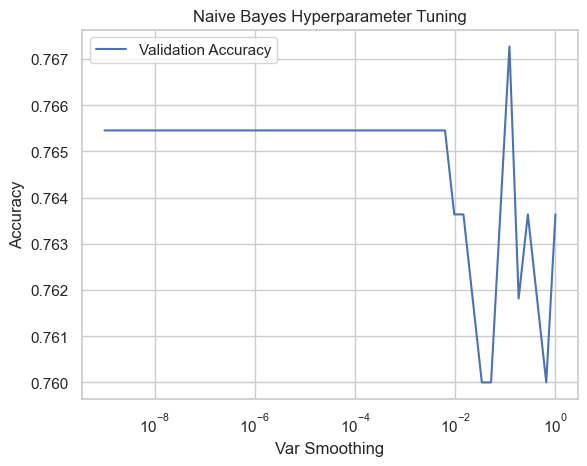

In [9]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_var_smoothing'], results['mean_test_score'], label="Validation Accuracy")
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Hyperparameter Tuning')
plt.legend()
plt.show()

In [10]:
y_test_pred = grid_search.predict(X_test)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [11]:
print(f"Test Set Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Test Set Metrics:
Precision: 0.82
Recall: 0.82
F1-Score: 0.82


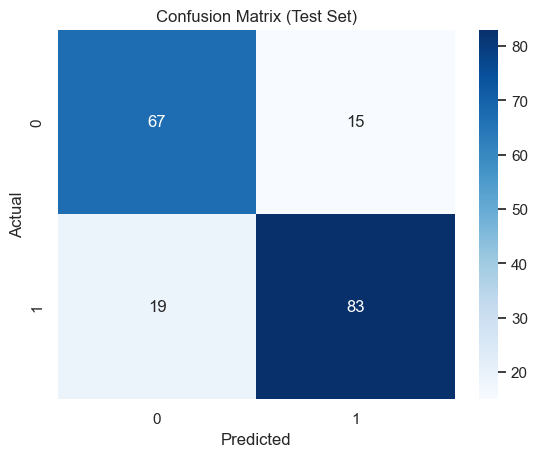

In [12]:
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        82
           1       0.85      0.81      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



In [14]:
linkage_matrix = linkage(X_scaled, method='ward')

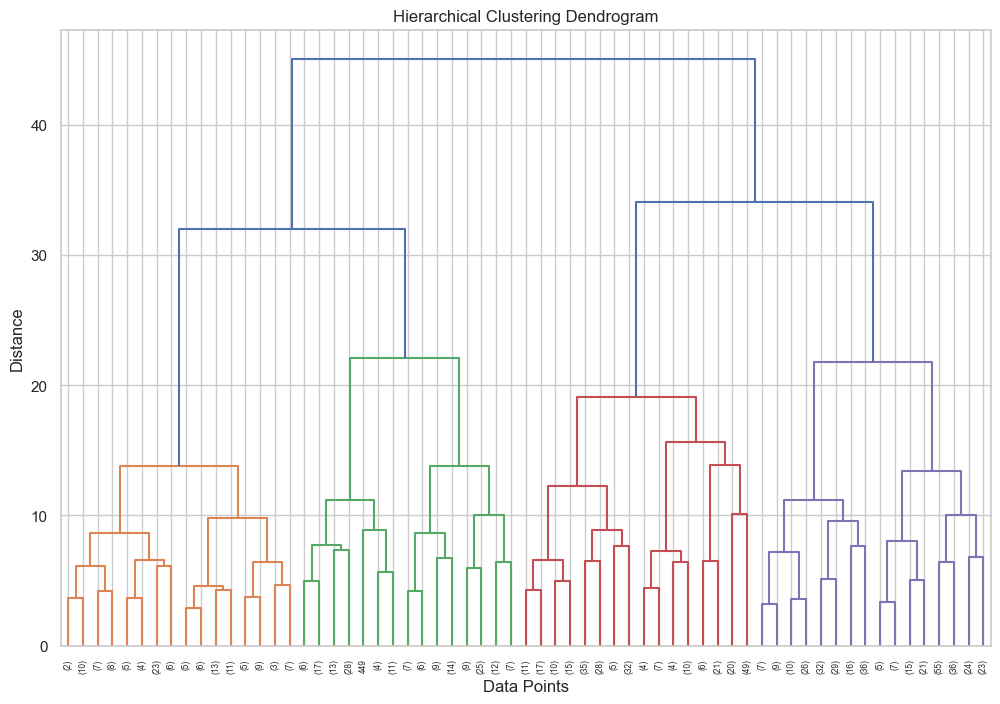

In [15]:
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [16]:
print("From the dendrogram, identify the optimal number of clusters based on the largest vertical distance between merges.")

From the dendrogram, identify the optimal number of clusters based on the largest vertical distance between merges.


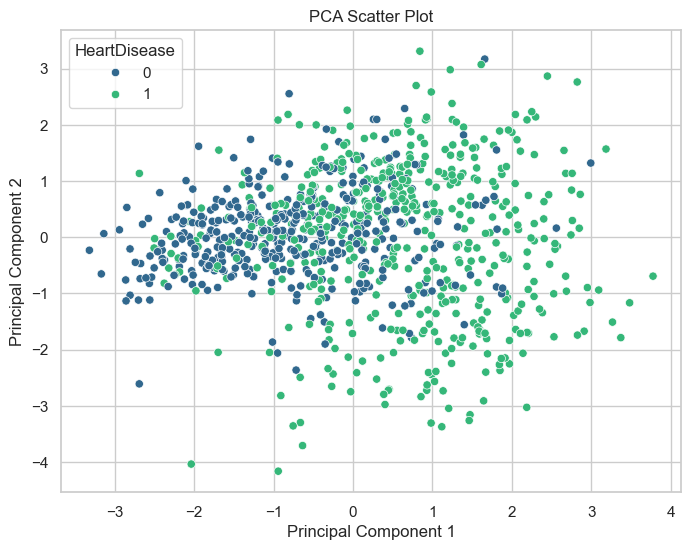

In [17]:
# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("PCA Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()